In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime

df = pd.read_csv("dataset_mood_smartphone.csv")
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
# only 27 unique id's, 4, 11, 18, 21, 22 missing from 1 to 33.
df.nunique()
df['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


In [4]:
# 202 rows with no value
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [5]:
# blocks warning from distplot, since it will soon be depreciated 
import warnings
warnings.filterwarnings('ignore')

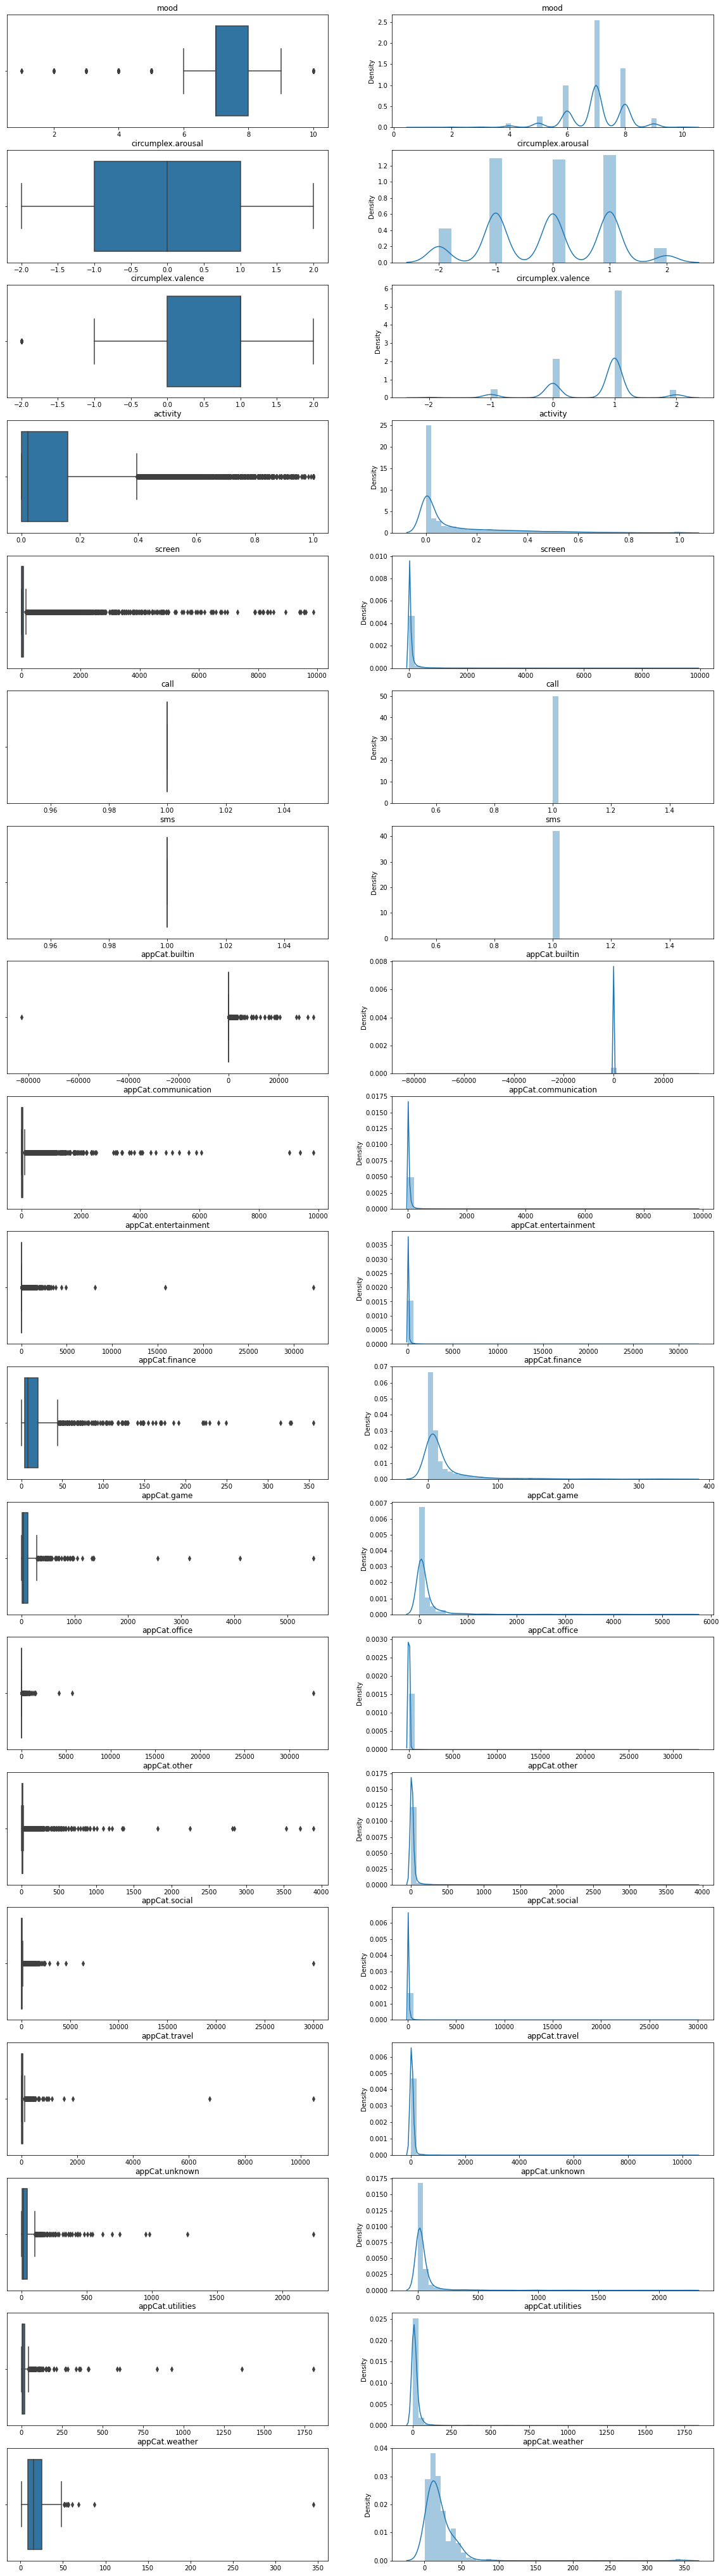

In [6]:
# 19 unique variables
# 'appCat.builtin' has negative duration -> isn't possible
# problem -> lots of outiers and lots of values 0/nan. Maybe check the outliers for each individual. 
# Possible to transform data if data distribution violates model?
fig, ax = plt.subplots(19, 2, figsize = (20, 74))
i = 0
for variable in df["variable"].unique():
    var = df[df['variable'] == variable]
    g1 = sns.boxplot(x= var["value"], ax = ax[i,0]).set(title="%s"% variable,xlabel=None)
    g2 = sns.distplot(var["value"], ax = ax[i,1]).set(title="%s"% variable,xlabel=None)
    i += 1

In [7]:
# change string id to number id
iddict = {'AS14.01':1, 'AS14.02':2, 'AS14.03':3, 'AS14.05':4, 'AS14.06':6, 'AS14.07':7,
       'AS14.08':8, 'AS14.09':9, 'AS14.12':12, 'AS14.13':13, 'AS14.14':14, 'AS14.15':15,
       'AS14.16':16, 'AS14.17':18, 'AS14.19':19, 'AS14.20':20, 'AS14.23':23, 'AS14.24':24,
       'AS14.25':25, 'AS14.26':26, 'AS14.27':27, 'AS14.28':28, 'AS14.29':29, 'AS14.30':30,
       'AS14.31':31, 'AS14.32':32, 'AS14.33':33}
df2 = df.replace({"id": iddict})
df2

,Unnamed: 0,id,time,variable,value
0,1,1,2014-02-26 13:00:00.000,mood,6.000
1,2,1,2014-02-26 15:00:00.000,mood,6.000
2,3,1,2014-02-26 18:00:00.000,mood,6.000
3,4,1,2014-02-26 21:00:00.000,mood,7.000
4,5,1,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [8]:
# sort data, for smallest and largest, remove unrealistic data points, plot again.
# transform with sqrt sqrt and or log, plot again
# determine IQR (with or without bootstrap) and check for outliers (3x IQR for extreme outliers)

In [9]:
# removed all values lower than -2, than filters circumplex values and removed all negative values
# so all unrealistic negative values are removed
df2 = df2.drop(df2.index[df2['value'] < -2])
df2 = df2.drop(df2.index[df2['Unnamed: 0'] == 484694]) # negative duration
df2 = df2.drop(df2.index[df2['Unnamed: 0'] == 754571]) # negative duration
#dflook = df.loc[(df['variable'] != 'circumplex.arousal') & (df['variable'] != 'circumplex.valence')]
#df2.sort_values(by=['value'], inplace=True, ascending=False)
#pd.set_option('display.max_rows', 500)
#df2.head(500)

In [11]:
# Create columns for variables that have a value
for var in df2["variable"].unique():
    df2['%s'%var] = np.where(df2['variable'] == var, df2['value'], np.NaN)

# Split the date-time in seperate columns, transform to a datetime format
df2[['date', 'time']] = df2['time'].str.split(' ', 1, expand=True)
df2['time'] = pd.to_datetime(df2['date'] + ' ' + df2['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [12]:
# for all duration values: 
    # datetime - datetime[i-1] = timedelta
    # if timedelta is larger than value, add to list
    # check list and remove values
    
df2.reset_index(inplace=True) # fixes indexing after removing negative values
variables = ['activity',
       'screen', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather']
removelist = []

for vari in variables:   
    for index, row in df2.iterrows():
#         if np.isnan(index):
#             continue
        if np.isnan(df2["%s"% vari][index]): # skips nan values
            continue
        if df2['variable'][index] != df2['variable'][index-1]: # makes sure same variable is compared
            continue
        if df2['id'][index] != df2['id'][index-1]: # makes sure same id is compared
            continue
        if df2['time'][index]-df2['time'][index-1] < datetime.timedelta(seconds=df2["%s"% vari][index]): 
            removelist.append(index) # if value is unrealistic add to list
        

In [13]:
df2 = df2.drop(removelist)
len(df2)
print(len(removelist))
df2[:139940]
del df2['index']
df2.reset_index(inplace=True)

45976


In [14]:
# looks like large values from potentially peoples phone staying on during the night
df2.sort_values(by=['value'], inplace=True, ascending=False)
df2

,index,Unnamed: 0,id,time,variable,value,mood,circumplex.arousal,circumplex.valence,activity,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,date
139939,154276,2637110,3,2014-04-12 05:32:37.091,appCat.builtin,19372.478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-12
111724,122644,122645,29,2014-05-06 06:19:17.358,screen,8518.405,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-06
80700,86637,86638,18,2014-04-07 09:19:25.841,screen,5766.410,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-07
156303,173043,1013091,14,2014-04-11 20:38:48.111,appCat.builtin,5477.614,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-11
83556,89847,89848,18,2014-05-04 13:45:14.104,screen,4963.027,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,16858,16859,33,2014-05-16 20:00:00.000,circumplex.valence,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-16
16861,16861,16862,33,2014-05-17 12:00:00.000,circumplex.valence,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-17
16881,16881,16882,33,2014-05-21 16:00:00.000,circumplex.valence,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-21
16898,16898,16899,33,2014-05-24 23:00:00.000,circumplex.valence,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-24


In [15]:
df2.sort_values(by=['index'], inplace=True, ascending=True)

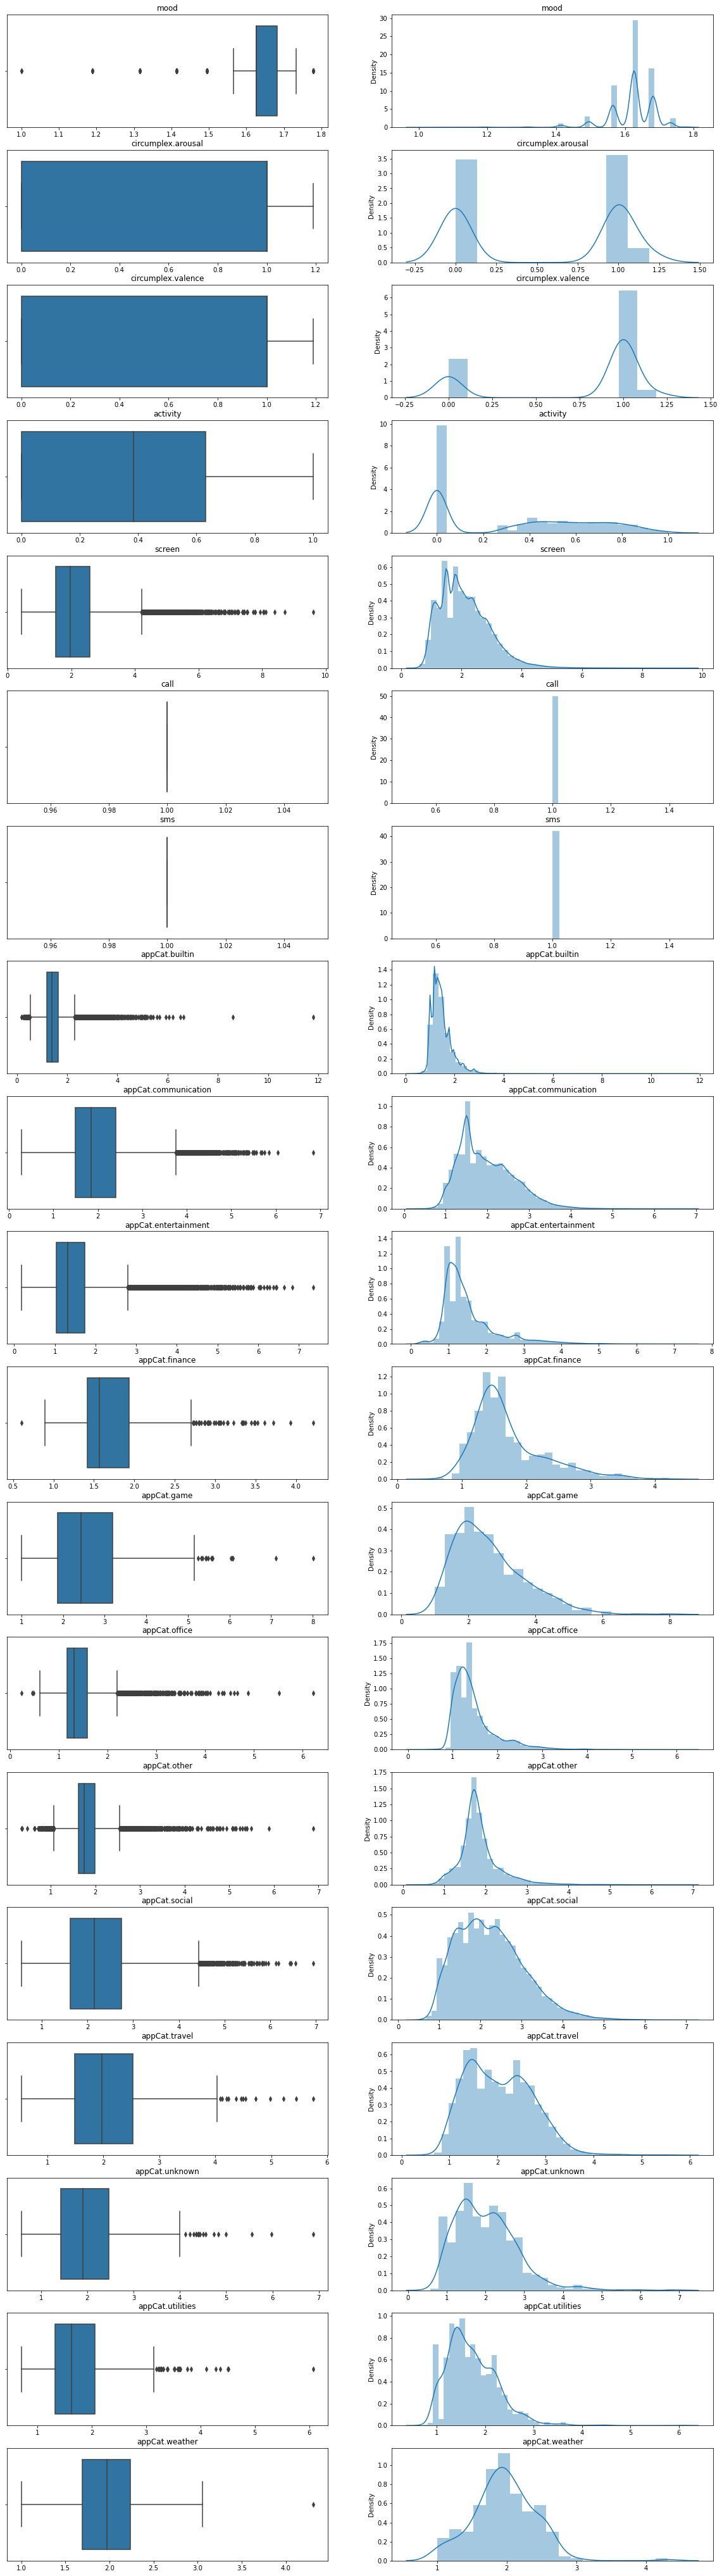

In [16]:
fig, ax = plt.subplots(19, 2, figsize = (20, 74))
i = 0
for variable in df2["variable"].unique():
    var = df2[df2['variable'] == variable]
    g1 = sns.boxplot(x= np.sqrt(np.sqrt(var["value"])), ax = ax[i,0]).set(title="%s"% variable,xlabel=None)
    g2 = sns.distplot(np.sqrt(np.sqrt(var["value"])), ax = ax[i,1]).set(title="%s"% variable,xlabel=None)
    i += 1

In [17]:
df2.to_csv('realistic_data.csv')

In [18]:
nooutliers_data = df2
numlist = ['mood','circumplex.arousal','circumplex.valence','activity','screen','call','sms','appCat.builtin',
           'appCat.communication','appCat.entertainment','appCat.finance','appCat.game','appCat.office','appCat.other',
           'appCat.social','appCat.travel','appCat.unknown','appCat.utilities','appCat.weather']
for column in nooutliers_data:
    if column in numlist:
        nooutliers_data[column] = np.sqrt(np.sqrt(nooutliers_data[column]))
nooutliers_data
        

,index,Unnamed: 0,id,time,variable,value,mood,circumplex.arousal,circumplex.valence,activity,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,date
0,0,1,1,2014-02-26 13:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
1,1,2,1,2014-02-26 15:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
2,2,3,1,2014-02-26 18:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
3,3,4,1,2014-02-26 21:00:00.000,mood,7.000,1.626577,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
4,4,5,1,2014-02-27 09:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330927,376903,2770399,30,2014-04-11 07:51:16.948,appCat.weather,8.032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683472,2014-04-11
330928,376904,2772465,30,2014-04-19 11:00:32.747,appCat.weather,3.008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.316951,2014-04-19
330929,376905,2774026,30,2014-04-26 10:19:07.434,appCat.weather,7.026,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.628085,2014-04-26
330930,376906,2774133,30,2014-04-27 00:44:48.450,appCat.weather,23.033,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.190724,2014-04-27


In [19]:
#IQR x 3 which removes extreme outliers

# Calculate quantiles and IQR
Q1 = nooutliers_data[numlist].quantile(0.25)
Q3 = nooutliers_data[numlist].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((nooutliers_data[numlist] < (Q1 - 3 * IQR)) | (nooutliers_data[numlist] > (Q3 + 3 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = nooutliers_data[condition]
filtered_df

,index,Unnamed: 0,id,time,variable,value,mood,circumplex.arousal,circumplex.valence,activity,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,date
0,0,1,1,2014-02-26 13:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
1,1,2,1,2014-02-26 15:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
2,2,3,1,2014-02-26 18:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
3,3,4,1,2014-02-26 21:00:00.000,mood,7.000,1.626577,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
4,4,5,1,2014-02-27 09:00:00.000,mood,6.000,1.565085,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330927,376903,2770399,30,2014-04-11 07:51:16.948,appCat.weather,8.032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683472,2014-04-11
330928,376904,2772465,30,2014-04-19 11:00:32.747,appCat.weather,3.008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.316951,2014-04-19
330929,376905,2774026,30,2014-04-26 10:19:07.434,appCat.weather,7.026,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.628085,2014-04-26
330930,376906,2774133,30,2014-04-27 00:44:48.450,appCat.weather,23.033,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.190724,2014-04-27


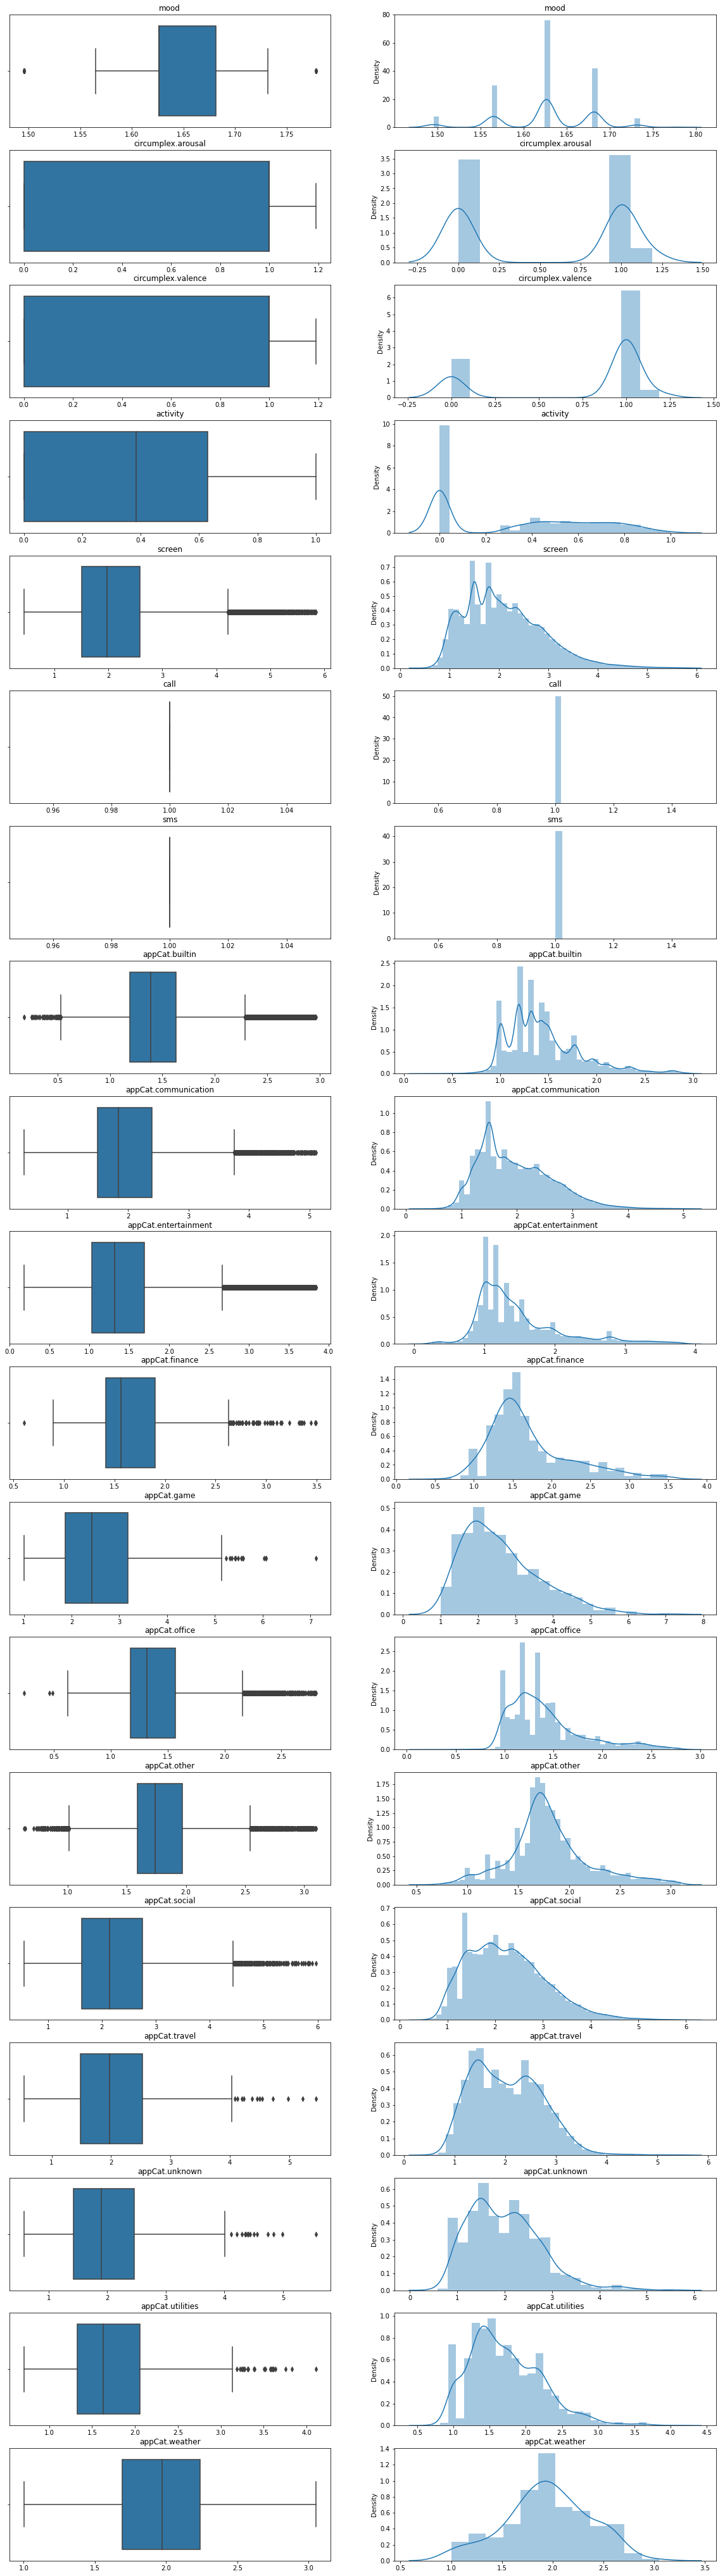

In [22]:
fig, ax = plt.subplots(19, 2, figsize = (20, 74))
i = 0
for variable in filtered_df["variable"].unique():
    var = filtered_df[filtered_df['variable'] == variable]
    g1 = sns.boxplot(x= np.sqrt(np.sqrt(var["value"])), ax = ax[i,0]).set(title="%s"% variable,xlabel=None)
    g2 = sns.distplot(np.sqrt(np.sqrt(var["value"])), ax = ax[i,1]).set(title="%s"% variable,xlabel=None)
    i += 1

In [23]:
filtered_df.to_csv('nooutliers_data.csv')